In [1]:
import requests
from lxml import html
import pandas as pd
import urllib.request, json 
import time

In [111]:
allzipcodes = pd.read_csv('us_postal_codes.csv')
# allzipcodes['Zip'] = allzipcodes['Zip'].apply(lambda x : int(x))
allzipcodes['Zip Code'] = allzipcodes['Zip Code'].apply(lambda x : str(x))
allzipcodes['Zip Code'] = allzipcodes['Zip Code'].apply(lambda x : '0' + x if len(x) == 4 else x)
allzipcodes['Zip Code'] = allzipcodes['Zip Code'].apply(lambda x : '00' + x if len(x) == 3 else x)
zipcodes = allzipcodes['Zip Code']

In [142]:
apikey = 'DKkJxZXvzKMZ1BDNPY1zgKA1b7oNLe82q72X8Tbt'
solar_radiation = []
codes = []
for i, zipcode in enumerate(zipcodesx):
    this_url = 'https://developer.nrel.gov/api/solar/solar_resource/v1.json?api_key='+apikey+'&address='+zipcode
    with urllib.request.urlopen(this_url) as url:
        data = json.loads(url.read().decode())
    
    
    print("{} of {} zipcodes processed: {}".format(i+1, len(zipcodes), zipcode), end = '\r')
    if 'annual' in data['outputs']['avg_dni']:
        solar_radiation.append(data['outputs']['avg_dni']['annual'])
    else:
        solar_radiation.append('error')
    codes.append(zipcode)
    
    if ((i+1) % 900) == 0:
        #Rest for 1 hour
        print('Resting for 1 hour before continuing, currently on zipcode no. {}'.format(i), end = '\r')
        time.sleep(3600) 
        
df = pd.DataFrame()
df['zipcode'] = codes
df['solar_radiation'] = solar_radiation
df.to_csv('Scraped_Solar_Data4.csv', index = False, header = True)

In [141]:
zipcodesx = list(zipcodes)
zipcodesx = zipcodesx[1:]

In [73]:
df = pd.DataFrame()
df['zipcode'] = codes
df['solar_radiation'] = solar_radiation
df.to_csv('Scraped_Solar_Data4.csv', index = False, header = True)

In [138]:
type(zipcodes)

set

In [21]:
df= df[df.solar_radiation != 'error']

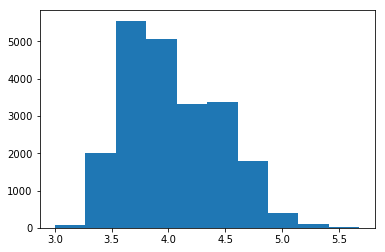

In [22]:
import matplotlib.pyplot as plt
plt.hist(df.solar_radiation)
plt.show()

In [77]:
cfile = pd.read_csv('Scraped_Solar_Data.csv')
cfile['zipcode'] = cfile['zipcode'].apply(lambda x : str(x))
cfile['zipcode'] = cfile['zipcode'].apply(lambda x : '0' + x if len(x) == 4 else x)
cfile['zipcode'] = cfile['zipcode'].apply(lambda x : '00' + x if len(x) == 3 else x)
c = cfile['zipcode']

In [78]:
dfile = pd.read_csv('Scraped_Solar_Data2.csv')
dfile['zipcode'] = dfile['zipcode'].apply(lambda x : str(x))
dfile['zipcode'] = dfile['zipcode'].apply(lambda x : '0' + x if len(x) == 4 else x)
dfile['zipcode'] = dfile['zipcode'].apply(lambda x : '00' + x if len(x) == 3 else x)
d = dfile['zipcode']

In [115]:
efile = pd.read_csv('Scraped_Solar_Data3.csv')
efile['zipcode'] = efile['zipcode'].apply(lambda x : str(x))
efile['zipcode'] = efile['zipcode'].apply(lambda x : '0' + x if len(x) == 4 else x)
efile['zipcode'] = efile['zipcode'].apply(lambda x : '00' + x if len(x) == 3 else x)
d = efile['zipcode']

In [143]:
result = pd.concat([cfile,dfile,efile, df])

In [147]:
result.to_csv('Solar_Radiation_by_zip.csv', header = True, index = False)

In [104]:
justprocessed = df.zipcode.tolist()#.extend(dfile.zipcode)
#processed = (processed.tolist)#.extend(cfile.zipcode)
#processed

In [109]:
#justprocessed.extend(dfile.zipcode)
justprocessed.extend(cfile.zipcode)

In [110]:
len(justprocessed)

40417

In [113]:
#a = zipcodes
#itemsToRemove = df.zipcode
zipcodes = set(zipcodes).difference(justprocessed)

In [84]:
len(b)  +len(df.zipcode)

28392

In [69]:
len(zipcodes)

9748